In [2]:
from data_loader import *
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [3]:
whole_data = []

# loop from 0 to the number of .hdf5 files you want to load
nb_files = 4180

for i in range(0,nb_files):
    # Selects the file
    file_to_load = 'h5/n2data_extended_ballroom_' + str(i) + '.hdf5'
    
    # Gets data
    data = data_loader(file_to_load)
    whole_data.append(data)
    if i%1000 == 0:
            print(f"We've already made {i} importation.")

    
print(len(whole_data))

We've already made 0 importation.
We've already made 1000 importation.
We've already made 2000 importation.
We've already made 3000 importation.
We've already made 4000 importation.
4180


In [4]:
# LIST -> Dictionary(Data) -> Features(numpy.ndarray)
# m -> the m-th example
# feature -> ODF_SET, PeDF_FULL_SET, PeDF_PARTIAL_SET, coeffs
# wavelet_level -> wavelet level
# whole_data[m][feature][wavelet_level]

print(type(whole_data[0]['ODF_SET'][0]))

print(f"O database possui {len(whole_data)} exemplos de treinamento.")
print(f"O nível Wavelet A2 tem {len(whole_data[0]['PeDF_PARTIAL_SET'][0])} amostras.")
print(f"O nível Wavelet D2 tem {len(whole_data[0]['PeDF_PARTIAL_SET'][1])} amostras.")
print(f"O nível Wavelet D1 tem {len(whole_data[0]['PeDF_PARTIAL_SET'][2])} amostras.")

print(whole_data[0]['bpm'])

<class 'numpy.ndarray'>
O database possui 4180 exemplos de treinamento.
O nível Wavelet A2 tem 149 amostras.
O nível Wavelet D2 tem 149 amostras.
O nível Wavelet D1 tem 298 amostras.
87


In [5]:
# CRIANDO VETOR PRÓPRIO Y
y = []
for j in range(0,len(whole_data)): 
    y.append(whole_data[j]['bpm'])
    
print(f"O valor máximo de andamento é {np.max(y)}.")
print(f"O valor mínimo de andamento é {np.min(y)}.")
#print(y)
y = np.array(y).reshape(len(whole_data),1)
print(type(y))
#print(y)
#Começará em 64 e irá de 8 em 8 até 216, (19 "variáveis booleanas") 

O valor máximo de andamento é 216.
O valor mínimo de andamento é 65.
<class 'numpy.ndarray'>


In [6]:
##BLOCO LABEL ENCONDER
Classe = []
for i in range(1,39): 
    a = 60+(4*i)
    Classe.append(a)
# [64 72 80 88 96 104 112 120 128 136]
#Classes = np.array(Classe).reshape(19,1)
Classes = np.array(Classe).reshape(38,1)

n_C = Classes.shape[0]

Y = np.zeros(y.shape)
Y = (y>=Classes[0])*1
for i in range(1,n_C):    
    Y += (y>=Classes[i])*1

print(Y[4168])
##BLOCO ONE HOT ENCONDER 
np.array(Y).reshape(len(whole_data),1)
onehotencoder = OneHotEncoder(categorical_features = [0])
Y = onehotencoder.fit_transform(Y).toarray()
print(Y[4168])


[23]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1.0
(3, 17, 18)


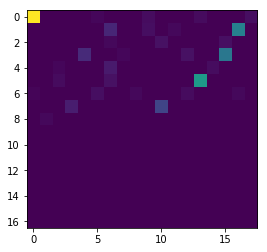

In [7]:
print(whole_data[0]['PeDF_PARTIAL_SET'][2][0])
lista = []

for j in range(0,len(whole_data)):  #varrer m-exemplos

    listaux0 = []    #D1
    listaux1 = []    #D2
    listaux2 = []    #A2
    listaux0.append(1)
    listaux1.append(1)    
    listaux2.append(1)  
    for i in range(1,len(whole_data[0]['PeDF_PARTIAL_SET'][2])):
        if (i<len(whole_data[j]['PeDF_PARTIAL_SET'][2])-1):
            if (whole_data[j]['PeDF_PARTIAL_SET'][2][i]>whole_data[j]['PeDF_PARTIAL_SET'][2][i-1] and whole_data[j]['PeDF_PARTIAL_SET'][2][i]>whole_data[j]['PeDF_PARTIAL_SET'][2][i+1]):
                listaux0.append(whole_data[j]['PeDF_PARTIAL_SET'][2][i])
            else:
                listaux0.append(0)
        else: 
            listaux0.append(0)

    for i in range(1,len(whole_data[0]['PeDF_PARTIAL_SET'][1])):
        if (i<len(whole_data[0]['PeDF_PARTIAL_SET'][1])-1):
            if (whole_data[j]['PeDF_PARTIAL_SET'][1][i]>whole_data[j]['PeDF_PARTIAL_SET'][1][i-1] and whole_data[j]['PeDF_PARTIAL_SET'][1][i]>whole_data[j]['PeDF_PARTIAL_SET'][1][i+1]):
                listaux1.append(whole_data[j]['PeDF_PARTIAL_SET'][1][i])
            else:
                listaux1.append(0)
        else: 
            listaux1.append(0)
        if (i<len(whole_data[0]['PeDF_PARTIAL_SET'][0])-1):
            if (whole_data[j]['PeDF_PARTIAL_SET'][0][i]>whole_data[j]['PeDF_PARTIAL_SET'][0][i-1] and whole_data[j]['PeDF_PARTIAL_SET'][0][i]>whole_data[j]['PeDF_PARTIAL_SET'][0][i+1]):
                listaux2.append(whole_data[j]['PeDF_PARTIAL_SET'][2][i])
            else:
                listaux2.append(0)
        else: 
            listaux2.append(0)
            
#Setar shape 298, 149, 149 17x18 = 306 
    for i in range(0,8):
        listaux0.append(0)
    for i in range(0,8+149):
        listaux1.append(0)
        listaux2.append(0)

#
    lista.append([listaux0, listaux1, listaux2]) #len = 3*306*4180 - 3837240 dados
#print(lista[2][0])
lista = np.array(lista).reshape(len(whole_data),3,17,18) #(4180,3,17,18)

# exemplos --> nível wavelet --> imagem (17x18)
listaux0 = np.array(listaux0).reshape(17,18)
listaux1 = np.array(listaux1).reshape(17,18)
listaux2 = np.array(listaux2).reshape(17,18)

print(lista[1].shape)
#imagem

imgplot = plt.imshow(lista[1][2])


Text(0.5,1,'A2')

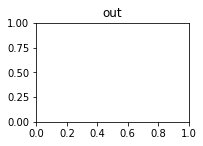

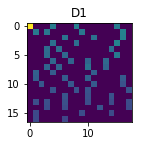

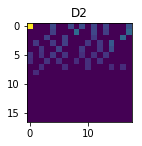

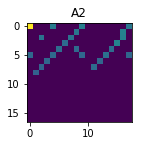

In [8]:
fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
#imgplot = plt.imshow(out)
a.set_title('out')
fig = plt.figure()
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(lista[0][0])
a.set_title('D1')
fig = plt.figure()
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(lista[0][1])
a.set_title('D2')
fig = plt.figure()
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(lista[0][2])
a.set_title('A2')

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(lista,Y,test_size=0.08,random_state=0)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(3845, 3, 17, 18)
(335, 3, 17, 18)
(3845, 38)
(335, 38)


C:\Users\Enrique\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [11]:
model = Sequential()
model.add(Conv2D(input_shape=(3,17,18),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
#model.add(Dense(units=19, activation="softmax"))
model.add(Dense(units=38, activation="softmax"))

In [12]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3, 17, 64)         10432     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 17, 64)         36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              2101248   
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_3 (Dense)              (None, 38)               

In [14]:
epochs=5
H = model.fit(X_train, Y_train, batch_size=32, epochs=epochs)

Epoch 1/5
3845/3845 [==============================] - 58s 15ms/step - loss: 1.6072 - accuracy: 0.5662
Epoch 2/5
3845/3845 [==============================] - 54s 14ms/step - loss: 0.8974 - accuracy: 0.7534
Epoch 3/5
3845/3845 [==============================] - 57s 15ms/step - loss: 0.7005 - accuracy: 0.7938
Epoch 4/5
3845/3845 [==============================] - 53s 14ms/step - loss: 0.5871 - accuracy: 0.8283
Epoch 5/5
3845/3845 [==============================] - 53s 14ms/step - loss: 0.4745 - accuracy: 0.8520


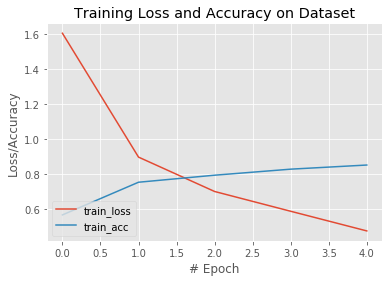

In [15]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("# Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig("plot.png")

In [16]:
y_predval = model.predict(X_val)
y_predval = (y_predval > 0.5)
print(y_predval[10])
print(Y_val[10])

[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
y_predtrain = model.predict(X_train)
y_predtrain = (y_predtrain > 0.5)
print(y_predtrain[1])
print(Y_train[1])

[False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
from sklearn.metrics import confusion_matrix
cmval = confusion_matrix(Y_val[1], y_predval[1])
print(cmval)

[[37  0]
 [ 0  1]]


In [19]:
a=0
for i in range(0,len(Y_val)):
    cm = confusion_matrix(Y_val[i], y_predval[i])
    if (cm[0][0]==37):
        a=a+1
b=0
for i in range(0,len(Y_train)):
    cm = confusion_matrix(Y_train[i], y_predtrain[i])
    if (cm[0][0]==37):
        b=b+1

print(f"O conjunto de treinamento acertou {b} músicas das {len(Y_train)} do database")
print(f"O conjunto de acertou acertou {a} músicas das {len(Y_val)} do database")

O conjunto de treinamento acertou 3563 músicas das 3845 do database
O conjunto de acertou acertou 291 músicas das 335 do database


In [20]:
print(f"O conjunto de treinamento tem {b*100/(len(Y_train))}% de acerto.")
print(f"O conjunto de validação tem {a*100/(len(Y_val))}% de acerto.")

O conjunto de treinamento tem 92.66579973992198% de acerto.
O conjunto de validação tem 86.86567164179104% de acerto.
